In [1]:
%load_ext watermark
%watermark

2020-09-12T19:17:12-05:00

CPython 3.7.6
IPython 7.13.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-47-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn import datasets

In [3]:
cancer_datos = datasets.load_breast_cancer()

cancer_df = pd.DataFrame(cancer_datos["data"], columns=cancer_datos["feature_names"])

cancer_df["objetivo"] = cancer_datos.target
cancer_df["objetivo"] = cancer_df["objetivo"].replace({0:1, 1:0})

In [4]:
cancer_df["objetivo"].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: objetivo, dtype: float64

In [5]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
X = cancer_df[cancer_datos["feature_names"]]
y = cancer_df["objetivo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
modelo = LogisticRegression(max_iter=5000, tol=0.01)

modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)
clases_reales = y_test
predicciones_probabilidades = modelo.predict_proba(X_test)

In [9]:
def tupla_clase_prediccion(y_real,y_prediccion):
    return list(zip(y_real, y_prediccion))

tupla_clase_prediccion(clases_reales, predicciones)[:10]

[(0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0)]

## Clasificación binaria
En clasificación binaria existe el concepto de casos negativos (clase 0, en este dataset si el cancer es benigno lo clasificamos como 0) y casos positivos (clase 1, en este caso si el cancer es maligno será 1). Positivo y negativo no significa que un resultado sea bueno sino que se clasifica como positivo el valor que estamos tratando de detectar
* Casos Positivos: Casos donde la clase es 1 (canceres malignos)
* Casos negativos: Casos donde la clase es 0 (canceres benignos)

Esto nos lleva a tener 2 posibles resultados:
* Verdaderos positivos (True Positives), serían las imagenes con un cancer maligno que se detectan como cancer maligno
* Falsos Positivos (False Positives), Serían las imagenes de cancer benigno que se detectan como cancer maligno.
* Verdaderos negativos (True negatives), Serían las imagenes de cancer benigno que se detectan como benigno.
* Falsos Negativos (False negatives), Serían los canceres maligno que se detectan como benignos.

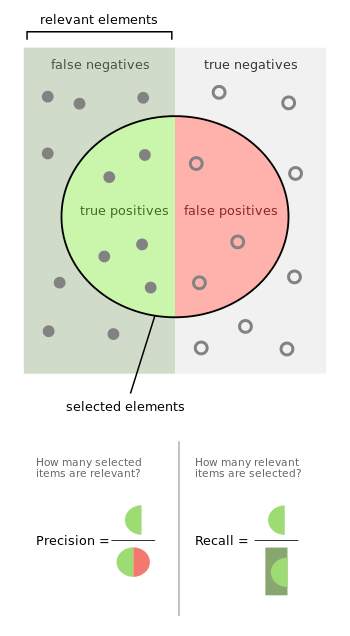

La imagen anterior muestra las posibilidades que se presentaron

In [10]:
def VP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales,predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==1])

def VN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales,predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==0])

def FP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales,predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==1])

def FN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales,predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==0])

print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(clases_reales, predicciones),
    VN(clases_reales, predicciones),
    FP(clases_reales, predicciones),
    FN(clases_reales, predicciones)
))


Verdaderos Positivos: 61
Verdaderos Negativos: 106
Falsos Positivos: 2
Falsos Negativos: 2



## Medidas para evaluar modelos de clasificación (clasiicación binaria)

### Exactitud (Accuracy)

Mide el comportamiento del modelo, porcentaje de casos clasificados correctamente

$$Exactitud = \dfrac{Número \ de \ observaciones \ correctamente \ clasificadas}{Número \ de \ observaciones \ totales} = \dfrac{VP + VN}{VP + VN + FP + FN}$$

In [11]:
def exactitud(clases_reales,predicciones):
    vp = VP(clases_reales, predicciones)
    vn = VN(clases_reales, predicciones)
    return (vp+vn)/len(predicciones)

exactitud(clases_reales,predicciones)

0.9766081871345029

In [12]:
from sklearn import metrics
metrics.accuracy_score(clases_reales,predicciones)

0.9766081871345029

## Precisión (Precission)

La precisión indica la habilidad del modelo para clasificar datos como positivos.

$$Precision = \dfrac{Número \ de \ observaciones \ positivas \ correctamente \ clasificadas}{Número \ de \ observaciones \ clasificadas \ como \ positivas} = \dfrac{VP}{VP+FP}$$

In [13]:
def precision(clases_reales,predicciones):
    vp = VP(clases_reales, predicciones)
    fp = FP(clases_reales, predicciones)
    return vp / (vp+fp)

precision(clases_reales,predicciones)

0.9682539682539683

In [14]:
metrics.average_precision_score(clases_reales, predicciones)

0.9492116534723051

## Exhaustividad o sensibilidad (Recall o True positive relative)

La sensibilidad da una medida de la habilidad del modelo para encontrar todos los casos positivos.

$$Sensibilidad = \dfrac{Número \ de \ observaciones \ positivas \ clasificadas \ como \ positivas}{Número \ de \ observaciones \ positivas \ totales} = \dfrac{VP}{VP+FN}$$

In [15]:
def sensibilidad(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fn = FN(clases_reales, predicciones)
    return vp / (vp+fn)

sensibilidad(clases_reales, predicciones)

0.9682539682539683

In [16]:
metrics.recall_score(clases_reales, predicciones)

0.9682539682539683

## Matriz de confusión

la matriz de confusión es una forma sencilla de comparar como ha clasificado cada observación el modelo.

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(clases_reales, predicciones)

array([[106,   2],
       [  2,  61]])

En la diagonal se encuentran los datos clasificados correctamente

## Puntuación F1 Score

La puntuación F1 es una media harmonica entre la sensibilidad y la precisión

Se define como

$$F1 = 2*\dfrac{1}{\frac{1}{precision}+\frac{1}{sensibilidad}} = 2*\dfrac{precision*sensibilidad}{precision+sensibilidad}$$

In [18]:
def puntuacion_f1(clases_reales, predicciones):
    precision_preds = precision(clases_reales, predicciones)
    sensibilidad_preds = sensibilidad(clases_reales, predicciones)
    return 2*((precision_preds*sensibilidad_preds)/(precision_preds+sensibilidad_preds))

puntuacion_f1(clases_reales, predicciones)

0.9682539682539683

In [19]:
metrics.f1_score(clases_reales, predicciones)

0.9682539682539683

## Radio de falsos positivos (Radio de falsa alarma o FPR)

Nos dice cuantos errores tiene nuestro modelo, es decir, cuantas veces ha predicho positivo cuando no era positivo

Se define como:

$$FPR = \dfrac{Número \ de \ observaciones \ negativas \ clasificadas \ como \ positivas}{Número \ de \ observaciones \ totales} = \dfrac{FP}{FP+VN}$$

In [20]:
def fpr(clases_reales, predicciones):
    return FP(clases_reales, predicciones) / (
        FP(clases_reales, predicciones) + VN(clases_reales, predicciones)
    )

fpr(clases_reales, predicciones)

0.018518518518518517

## ¿Cómo se clasifica un modelo?

Un modelo como la regresión lineal funciona prediciendo distancias a una linea **"linea de decisión"** que se convierten en probabilidades para cada clase. Sin embargo al modelo le suele interesar sólo saber que clase predice el modelo. Esto se hace decidiendo un umbral *(threshold)* y clasificando los casos con menor probabilidad como clase negativa y mayor probabilidad como clase positiva. 

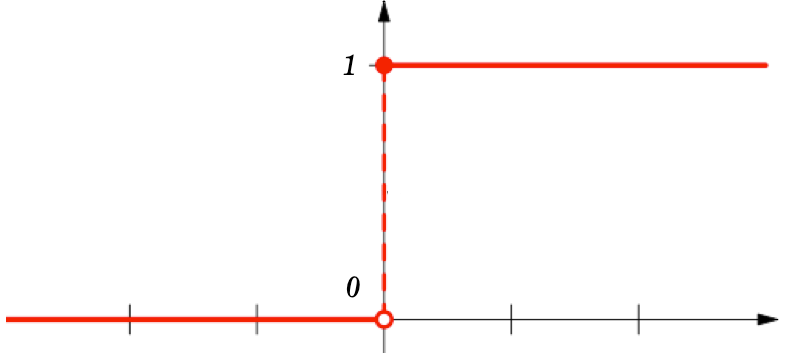

En la gráfica se muestra como se comporta este modelo al definir un umbral, todo lo que este por debajo de un determinado valor será una clase y todo lo que haya por encima será otra clase.

In [21]:
df = pd.DataFrame({"clase_real":clases_reales,
                  "clase_predicho":predicciones,
                  "probabilidades_0":modelo.predict_proba(X_test)[:,0],
                  "probabilidades_1":modelo.predict_proba(X_test)[:,1],
                  })

df["sum_probas"] = df["probabilidades_0"] + df["probabilidades_1"]
df.head()

,clase_real,clase_predicho,probabilidades_0,probabilidades_1,sum_probas
204,0,0,8.623999e-01,0.137600,1.0
70,1,1,4.495507e-08,1.000000,1.0
131,1,1,1.690969e-03,0.998309,1.0
431,0,0,9.987583e-01,0.001242,1.0
540,0,0,9.997805e-01,0.000220,1.0


In [22]:
modelo.predict_proba(X_test)[:,0][:10]

array([8.62399859e-01, 4.49550661e-08, 1.69096863e-03, 9.98758302e-01,
       9.99780462e-01, 1.79335657e-10, 6.00595129e-11, 1.88852176e-02,
       9.80050670e-01, 9.94257922e-01])

In [23]:
modelo.predict_proba(X_test)[:10]

array([[8.62399859e-01, 1.37600141e-01],
       [4.49550661e-08, 9.99999955e-01],
       [1.69096863e-03, 9.98309031e-01],
       [9.98758302e-01, 1.24169849e-03],
       [9.99780462e-01, 2.19537833e-04],
       [1.79335657e-10, 1.00000000e+00],
       [6.00595129e-11, 1.00000000e+00],
       [1.88852176e-02, 9.81114782e-01],
       [9.80050670e-01, 1.99493296e-02],
       [9.94257922e-01, 5.74207822e-03]])

In [24]:
df.head(10)

,clase_real,clase_predicho,probabilidades_0,probabilidades_1,sum_probas
204,0,0,8.623999e-01,0.137600,1.0
70,1,1,4.495507e-08,1.000000,1.0
131,1,1,1.690969e-03,0.998309,1.0
431,0,0,9.987583e-01,0.001242,1.0
540,0,0,9.997805e-01,0.000220,1.0
567,1,1,1.793357e-10,1.000000,1.0
369,1,1,6.005951e-11,1.000000,1.0
29,1,1,1.888522e-02,0.981115,1.0
81,0,0,9.800507e-01,0.019949,1.0
477,0,0,9.942579e-01,0.005742,1.0


El modelo no tiene ningún motivo para elegir un umbral y por esto siempre establece 0.5 para cada clase por defecto

## Curva precisión (Precission-Recall Curve)

In [25]:
df[(df.probabilidades_1>0.5) & (df.clase_predicho==0)]

,clase_real,clase_predicho,probabilidades_0,probabilidades_1,sum_probas


In [26]:
df[(df.probabilidades_0>0.5) & (df.clase_predicho==1)]

,clase_real,clase_predicho,probabilidades_0,probabilidades_1,sum_probas


In [27]:
#predicciones_probabilidades -> tupla de probabilidad_0 y probabilidad_1

def probabilidades_a_clases(predicciones_probabilidades, umbral=0.5):
    predicciones = np.zeros([len(predicciones_probabilidades)])
    predicciones[predicciones_probabilidades[:,1]>=umbral] = 1
    return predicciones

"""
def probabilidades_a_clases(df,umbral=0.5):
    df.loc[df["probabilidades_1"] >= umbral, "clase_predicho"] = 1
    df.loc[df["probabilidades_0"] >= umbral, "clase_predicho"] = 0
    predicciones = df["clase_predicho"]
    return np.array(predicciones)
"""
#df2 = df
#df2.loc[df2["probabilidades_1"]<=0.2, "clase_predicho"] = 0
#df2

'\ndef probabilidades_a_clases(df,umbral=0.5):\n    df.loc[df["probabilidades_1"] >= umbral, "clase_predicho"] = 1\n    df.loc[df["probabilidades_0"] >= umbral, "clase_predicho"] = 0\n    predicciones = df["clase_predicho"]\n    return np.array(predicciones)\n'

In [28]:
df2 = df
probabilidades_a_clases(predicciones_probabilidades,umbral=0.4)[:10]

array([0., 1., 1., 0., 0., 1., 1., 1., 0., 0.])

In [29]:
df2.sample(10)

,clase_real,clase_predicho,probabilidades_0,probabilidades_1,sum_probas
561,0,0,9.990437e-01,0.000956,1.0
528,0,0,9.994701e-01,0.000530,1.0
257,1,1,4.626968e-03,0.995373,1.0
425,0,0,9.996982e-01,0.000302,1.0
79,0,0,9.834491e-01,0.016551,1.0
145,0,0,9.994199e-01,0.000580,1.0
184,1,1,2.424527e-01,0.757547,1.0
568,0,0,9.999469e-01,0.000053,1.0
18,1,1,2.906120e-12,1.000000,1.0
33,1,1,1.710128e-07,1.000000,1.0


In [30]:
from ipywidgets import widgets,fixed,interact

@interact(umbral=widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.01))
def evaluar_umbral(umbral):
    predicciones = probabilidades_a_clases(predicciones_probabilidades,umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones)
    fpr_umbral = fpr(clases_reales, predicciones)
    precision_umbral = metrics.average_precision_score(clases_reales, predicciones)
    print("""
    Precision: {:.3f}
    Sensibilidad: {:.3f}
    Ratio de alarma: {:.3f}
    """.format(
        precision_umbral,sensibilidad_umbral,fpr_umbral
    ))

interactive(children=(FloatSlider(value=0.01, description='umbral', max=0.99, min=0.01, step=0.01), Output()),…

In [31]:
def evaluar_umbral(umbral):
    predicciones = probabilidades_a_clases(predicciones_probabilidades,umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones)
    fpr_umbral = fpr(clases_reales, predicciones)
    precision_umbral = metrics.average_precision_score(clases_reales, predicciones)
    return precision_umbral,sensibilidad_umbral,fpr_umbral

rango_umbral = np.linspace(0.,1.,100)
sensibilidad_umbrales = []
precision_umbrales = []
fpr_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral, fpr_umbral = evaluar_umbral(umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)
    precision_umbrales.append(precision_umbrales)
    fpr_umbrales.append(fpr_umbral)

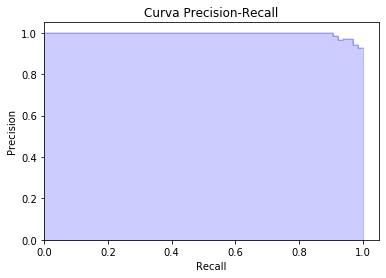

In [32]:
def grafica_precision_recall(clases_reales, predicciones_probabilidades):
    precision_, recall_, _ = metrics.precision_recall_curve(
        clases_reales, predicciones_probabilidades[:,1])

    plt.step(recall_, precision_, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall_, precision_, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Curva Precision-Recall');
    plt.show()


grafica_precision_recall(clases_reales, predicciones_probabilidades)

## Area bajo la curva (Area Under the curve, ROC-AUC)

Curva que relaciones el FPR y la sensibilidad y el area de esta curva se llama AUC. El valor indica el porcentaje de aciertos del modelo. El valor minimo de esto debe ser 0.5, si se obtiene un valor menor el modelo no sirve

Text(0.5, 1.0, 'Curva ROC')

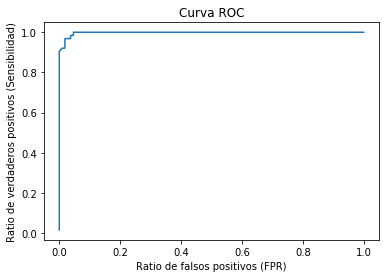

In [33]:
plt.plot(fpr_umbrales, sensibilidad_umbrales)
plt.xlabel("Ratio de falsos positivos (FPR)")
plt.ylabel("Ratio de verdaderos positivos (Sensibilidad)")
plt.title("Curva ROC")

In [34]:
metrics.roc_auc_score(clases_reales, predicciones)

0.974867724867725

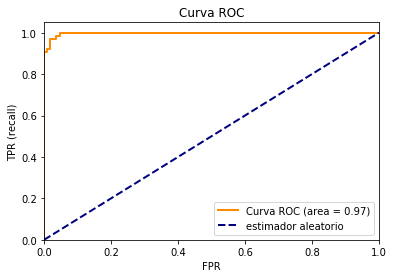

In [35]:
def grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades):
    fpr, tpr, _ = metrics.roc_curve(clases_reales, predicciones_probabilidades[:,1])
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    plt.figure()

    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="estimador aleatorio")
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR (recall)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show();

grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades)

In [36]:
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("""
        Exactitud: {:.3f}
        Precision: {:.3f}
        Sensibilidad: {:.3f}
        Area bajo curva: {:.3f}
        Puntuación F1: {:.3f}
    """.format(
        exactitud,precision,sensibilidad,
        roc_auc, f1
    ))
    
evaluar_modelo(clases_reales, predicciones, predicciones_probabilidades)


        Exactitud: 0.977
        Precision: 0.949
        Sensibilidad: 0.968
        Area bajo curva: 0.975
        Puntuación F1: 0.968
    


# Evaluación en dataset imbalanceados

https://www.kaggle.com/c/GiveMeSomeCredit/data

Se utiliza el dataset del link porque este se encuentra desbalanceado

In [37]:
creditos_df = pd.read_csv("datos_creditos.csv")

In [38]:
creditos_df.head()

,impago_en_2_anos,deuda_credito,edad,n_veces_pagos_retrasados_30_59_dias,ratio_deuda_mensual_salario,salario,n_lineas_credito_y_prestamos,n_veces_pagos_retrasados_90_dias,n_hipotecas,n_veces_pagos_retrasados_60_89_dias,numero_personas_dependientes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [39]:
variable_objetivo = "impago_en_2_anos"

In [40]:
X = creditos_df.drop(variable_objetivo,axis=1)
y = creditos_df[variable_objetivo]

X_train_credito, X_test_credito, y_train_credito, y_test_credito = train_test_split(
    X,y,test_size=0.3,random_state=42)

In [41]:
y.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: impago_en_2_anos, dtype: float64

Este dataset se caracteriza porque la mayoria de los casos estan en negativo, es decir que la gente paga sus creditos. Por tanto se puede decir que las clases estan muy imbalanceadas

In [42]:
modelo = LogisticRegression(max_iter=5000, tol=0.01)

modelo.fit(X_train_credito, y_train_credito)

predicciones_creditos = modelo.predict(X_test_credito)
clases_reales_creditos = y_test_credito
predicciones_probabilidades_creditos = modelo.predict_proba(X_test_credito)

In [43]:
evaluar_modelo(clases_reales_creditos, predicciones_creditos, predicciones_probabilidades_creditos)


        Exactitud: 0.934
        Precision: 0.086
        Sensibilidad: 0.042
        Area bajo curva: 0.520
        Puntuación F1: 0.078
    


In [44]:
len(creditos_df[creditos_df[variable_objetivo] == 1])

10026

In [45]:
len([pred for pred in predicciones if pred == 1])

63

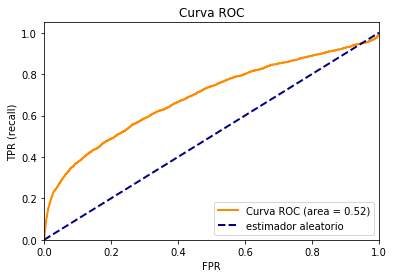

In [46]:
grafica_curva_auc(clases_reales_creditos, predicciones_creditos, predicciones_probabilidades_creditos)

# ¿Cómo decidir un umbral de decisión?
miremos el dataset de *cancer_df* 

In [47]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [52]:
modelo_2 = LogisticRegression(max_iter=5000,tol=0.01)
X = cancer_df.drop("objetivo",axis=1)
y = cancer_df["objetivo"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

modelo_2.fit(X_train, y_train)
predicciones = modelo_2.predict(X_test)
clases_reales = y_test
predicciones_probabilidades = modelo_2.predict_proba(X_test)

In [53]:
probas = modelo_2.predict_proba(X_test)[:10]
probas

array([[8.62399859e-01, 1.37600141e-01],
       [4.49550661e-08, 9.99999955e-01],
       [1.69096863e-03, 9.98309031e-01],
       [9.98758302e-01, 1.24169849e-03],
       [9.99780462e-01, 2.19537833e-04],
       [1.79335657e-10, 1.00000000e+00],
       [6.00595129e-11, 1.00000000e+00],
       [1.88852176e-02, 9.81114782e-01],
       [9.80050670e-01, 1.99493296e-02],
       [9.94257922e-01, 5.74207822e-03]])

In [54]:
umbral_decision = 0.5

probas[:,1]>=umbral_decision

array([False,  True,  True, False, False,  True,  True,  True, False,
       False])

In [58]:
umbral_decision = 0.005

probas[:,1]>=umbral_decision

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True])

### definir variables de negocio como costos de falsos positivos y falso negativo en este umbral de decision

la función softmax calcula un umbral de acuerdo a los costes

In [65]:
def softmax(coste_fp, coste_fn):
    return np.exp(coste_fp) / (np.exp(coste_fn) + np.exp(coste_fp))
    
coste_fn = 0
coste_fp = 4
softmax(coste_fp,coste_fn)

0.9820137900379085

In [66]:
from ipywidgets import widgets,interact

@interact
def calculo_umbral(
    coste_fp = widgets.FloatSlider(min=1, max=100, step=1, value = 1),
    coste_fn = widgets.FloatSlider(min=1, max=100, step=1, value = 1)
):
    return softmax(coste_fp,coste_fn)

interactive(children=(FloatSlider(value=1.0, description='coste_fp', min=1.0, step=1.0), FloatSlider(value=1.0…

## Clase regresion logistica de negocio

In [68]:
class BusinessLogisticRegression(LogisticRegression):
    
    def decision_de_negocio(self, X, y, coste_fp=1, coste_fn=1, *args, **kwargs):
        probs = self.predict_proba(X)
        umbral_decision = calculo_umbral(coste_fp, coste_fn)
        print("umbral de decision: {}".format(umbral_decision))
        decisiones = probabilidades_a_clases(probs, umbral_decision)
        return decisiones
    
modelo_negocio = BusinessLogisticRegression(max_iter=5000)

modelo_negocio.fit(X_train,y_train)

BusinessLogisticRegression(C=1.0, class_weight=None, dual=False,
                           fit_intercept=True, intercept_scaling=1,
                           l1_ratio=None, max_iter=5000, multi_class='auto',
                           n_jobs=None, penalty='l2', random_state=None,
                           solver='lbfgs', tol=0.0001, verbose=0,
                           warm_start=False)

In [69]:
modelo_negocio.predict(X_test[:5])

array([0, 1, 1, 0, 0])

In [70]:
modelo_negocio.predict_proba(X_test[:5])

array([[8.62399859e-01, 1.37600141e-01],
       [4.49550661e-08, 9.99999955e-01],
       [1.69096863e-03, 9.98309031e-01],
       [9.98758302e-01, 1.24169849e-03],
       [9.99780462e-01, 2.19537833e-04]])

In [71]:
modelo_negocio.decision_de_negocio(X_test[:5],1,1)

umbral de decision: 0.5


array([0., 1., 1., 0., 0.])

In [72]:
@interact(
    coste_fp = widgets.FloatSlider(min=1, max=100, step=1, value = 1),
    coste_fn = widgets.FloatSlider(min=1, max=100, step=1, value = 1)
)
def desicion_negocio(coste_fp, coste_fn):
    predicciones = modelo_negocio.decision_de_negocio(X_test,coste_fp,coste_fn)
    print(confusion_matrix(clases_reales, predicciones))

interactive(children=(FloatSlider(value=1.0, description='coste_fp', min=1.0, step=1.0), FloatSlider(value=1.0…